## 1. 80,000 Chicago taxi trips

Let's do some data explorations!

In [1]:
# Loading lidyverse
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.2.0     ✔ purrr   0.3.2
✔ tibble  2.1.3     ✔ dplyr   0.8.3
✔ tidyr   0.8.3     ✔ stringr 1.2.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [2]:
taxi <- list.files(pattern = "*.csv", path="./data", 
full.names=TRUE) %>% map_df(~read_csv(., col_types = cols(
  .default = col_character(),
  trip_seconds = col_integer(),
  trip_miles = col_double(),
  pickup_community_area = col_integer(),
  dropoff_community_area = col_integer(),
  fare = col_double(),
  tips = col_double(),
  tolls = col_double(),
  extras = col_double(),
  trip_total = col_double(),
  pickup_latitude = col_double(),
  pickup_longitude = col_double(),
  dropoff_latitude = col_double(),
  dropoff_longitude = col_double()
)))
head(taxi)


unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,⋯,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<chr>,<chr>,<int>,<int>,⋯,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<chr>
bfa1a12e3724727654ac8f418dbf5b7c227ca29b,04b96cbbdcfe5b7cbb6884bc1b922819466f652662ead83eac149f6c108ce8ffd4bd7298abbe9ea2c33712f922a16f680c3543e2dbdbd929a8f1a8f44265d1ba,2013-01-10 21:15:00 UTC,2013-01-10 21:30:00 UTC,660,4.2,NA,NA,14,NA,⋯,0,11.25,Cash,NA,41.96807,-87.72156,POINT (-87.7215590627 41.968069),NA,NA,NA
6983463bb7de10b202ec8c4a55b9068e654516b4,70115efae1503007ba9131ca674d75c15f045e364f38240d02ae75b852facaa51580191264b12f482067653c0d99cc97a4b58a093dcc9c69e793327b27480761,2013-02-13 15:15:00 UTC,2013-02-13 16:45:00 UTC,6180,11.8,NA,NA,14,NA,⋯,0,48.65,Cash,NA,41.96807,-87.72156,POINT (-87.7215590627 41.968069),NA,NA,NA
7e2c30c1a0193e144449b428605d0cf7fd5f87c2,70115efae1503007ba9131ca674d75c15f045e364f38240d02ae75b852facaa51580191264b12f482067653c0d99cc97a4b58a093dcc9c69e793327b27480761,2013-03-02 01:15:00 UTC,2013-03-02 01:30:00 UTC,1020,9.9,NA,NA,14,NA,⋯,0,22.05,Cash,NA,41.96807,-87.72156,POINT (-87.7215590627 41.968069),NA,NA,NA
d846b5158ad0d49c06a4e058b680f6a69f6ae9fd,1d8661cf286a18a5105e132056c2aadf0b81a551e440fe24a277bd7788b745781717403d591c77238dee781850e9d9ca17c5afb07b61cf15569d98ff41caf179,2013-01-21 13:30:00 UTC,2013-01-21 13:45:00 UTC,900,6.7,NA,NA,14,NA,⋯,0,16.45,Cash,NA,41.96807,-87.72156,POINT (-87.7215590627 41.968069),NA,NA,NA
8714a615d59bbce09dfa9087c9a7b7849b45cb93,a1b762f1aec578cc84bb53bb095eaf9dffd68e6ad0c27187418462087e8a9568a8d98ced316271f1c63b26edf81376ed74f30eb4869d06bbec089b7698205d61,2013-01-07 07:15:00 UTC,2013-01-07 07:30:00 UTC,360,2.9,NA,NA,14,NA,⋯,0,8.65,Cash,NA,41.96807,-87.72156,POINT (-87.7215590627 41.968069),NA,NA,NA
97c691e02e3896468d1c47333950dde3a560a867,cf176d052fcb91b2d881dd619edb887d3de0f2a9bb739b7d22a9fb4293e6b08aae93ed76f3c1ab723e398aeec09df2d7937dd6b0f41b7546a0513557a8346463,2013-01-11 14:45:00 UTC,2013-01-12 00:00:00 UTC,33060,0.0,NA,NA,14,NA,⋯,0,0.00,Cash,NA,41.96807,-87.72156,POINT (-87.7215590627 41.968069),NA,NA,NA


In [5]:
# Filter out empty columns and values
taxi <- taxi %>% filter(!is.na(trip_start_timestamp) | trip_start_timestamp != "") %>% filter(trip_total > 0 )

# Select certain columns taxi_id, trip_seconds, trip_miles, fare, tolls, extras, trip_total, trip_start_timestamp, trip_end_timestamp,pickup_latitude, pickup_longitude
taxi <- taxi %>% select(taxi_id, trip_seconds, trip_miles, fare, tolls, extras, trip_total, trip_start_timestamp, trip_end_timestamp,pickup_latitude, pickup_longitude)

# Calculate the variance, min, and maximum fare
min(taxi$trip_total)
max(taxi$trip_total)
var(taxi$trip_total)


[1] 0.01

[1] 9051

[1] 5356.094

### Histogram of the fares

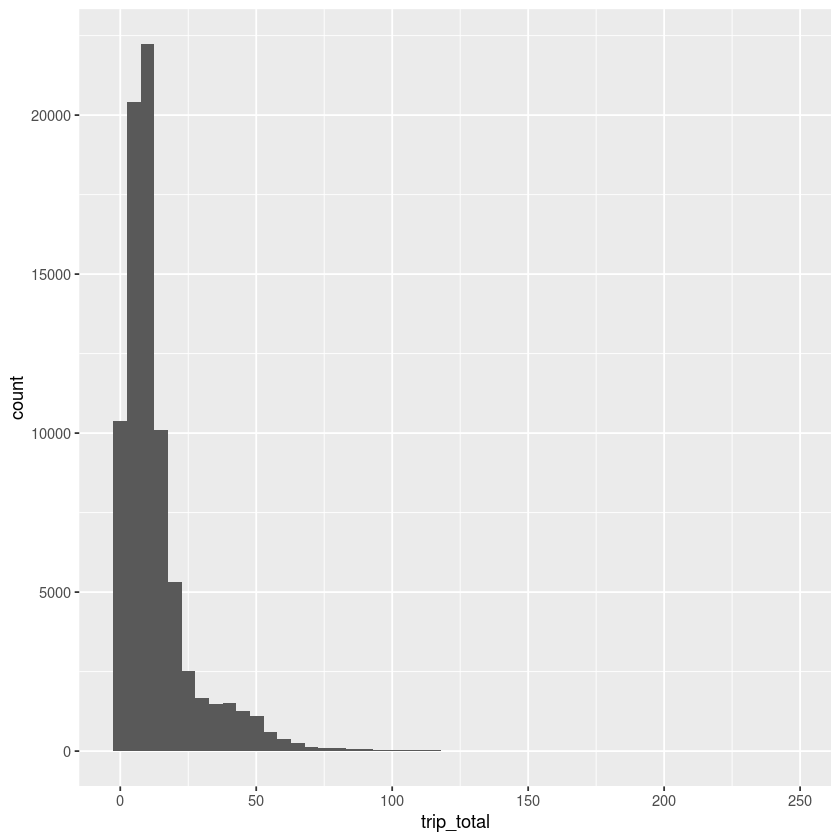

In [28]:
ggplot(taxi %>% filter(trip_total < 250), aes(x=trip_total)) + geom_histogram(bins=50)

In [6]:
# There is huge varaince between min and maximum fares .. A good trick to remedy the effect of outliers is to use the logarithmic of logs
taxi <- taxi %>% mutate(trip_total_logarithmic=log(trip_total))

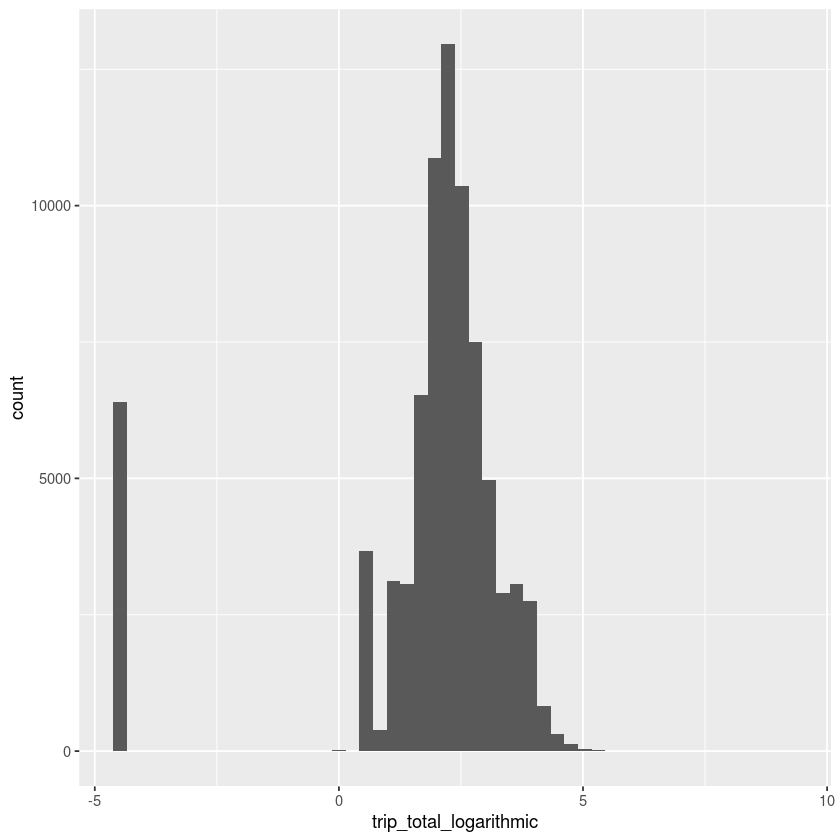

In [29]:
ggplot(taxi, aes(x=trip_total_logarithmic)) + geom_histogram(bins=50)

### Visualizing the begining of the journey

In [7]:
library(ggmap)
library(viridis)
#chicago <- get_map("chicago", zoom = 10, color = "bw")

chicago <- readRDS("data/chicago.rds")


Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Loading required package: viridisLite


In [57]:
# Saving the RDS for future use 
saveRDS(chicago, file = "./data/chicago.rds")


Warning message:
“Removed 47526 rows containing non-finite values (stat_bin2d).”

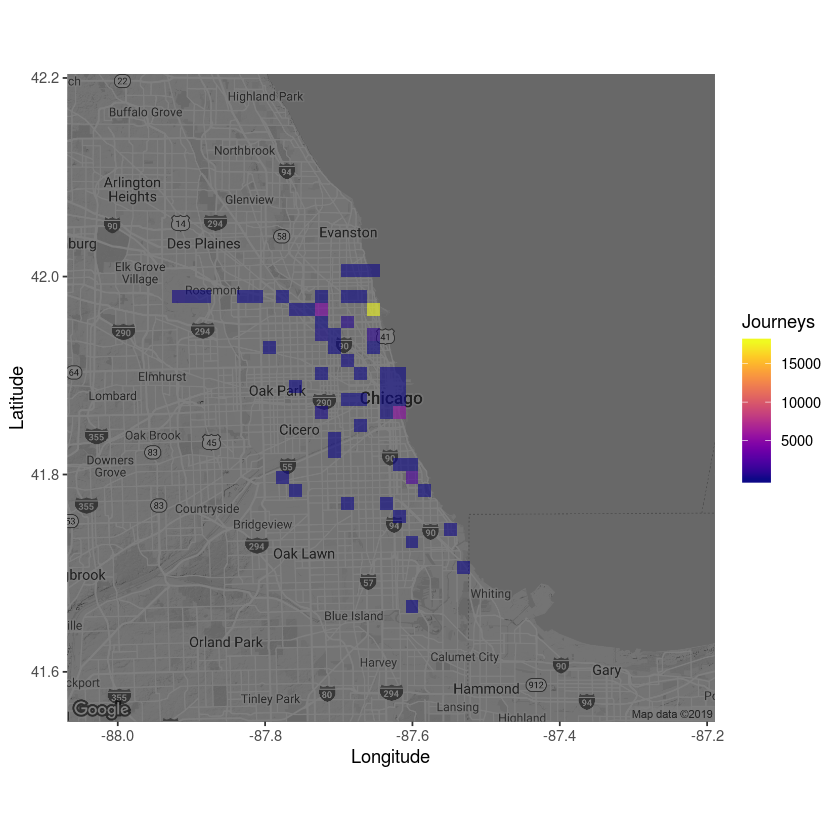

In [8]:

# Drawing a density map with the number of journey start locations
ggmap(chicago, darken = 0.5) +
   scale_fill_viridis(option = 'plasma') +
   geom_bin2d(data = taxi, aes(x=pickup_longitude, y=pickup_latitude), bins=50, alpha = 0.6) + labs(x='Longitude', y='Latitude', fill='Journeys')


### Breaking the datetime into week of day, month, and time-zones

library('lubridate')

taxi <- taxi %>% mutate(wkday=wday(trip_start_timestamp, label=TRUE, abbr=FALSE, locale = Sys.getlocale("LC_TIME")))
head(taxi)


### Question 1: Peak Time of day

### Question 2: Highest profitable routes..  

### Question 3: Trends of number rides per day across years


### Question 4: Average earnings of taxi drivers per month across years

### Question 5: Percentage of rides getting tips


### Question 5: Average number of hours worked by drivers per day, average earning per hours per day